# Word Sense Disambiguation (снятие лексической неоднозначности слов) и Word Sense Induction (нахождение значений слова)

WSD и WSI  - это связанные задачи про определение значений, в которых употребляются слова. WSI занимается определением возможных значений слова, а WSD нужна для того, чтобы определить, в каком из имеющихся значений слово употреблено в тексте. 

Основное предположение, на котором строятся все модели для снятия и определения неоднозначности - значение определяется в контексте. 

На практике WSD/WSI применяются достаточно редко. Современные модели (вроде BERT) используют фиксированные эмбединги для отдельных слов и преобразуют их в зависимости от контекста. Преобразованные (контекстуализированные) эмбединги удобно использовать для предсказания (именованных сущностей, частей речи, перевода), но из них нельзя вытащить информацию о том, сколько значений есть у слова. А это может требоваться в специфичных лингвистических задачах.   

Для нас WSD и WSI удобны тем, что на их примере можно познакомится с важными методами и инструментами.

# WSD

## WordNet

Выводить значения просто из текста тяжело, поэтому можно попробовать воспользоваться словарями (wsi сделанное людьми). Самый известный такой словарь - WordNet (https://wordnet.princeton.edu/), который есть в nltk. Для русского есть https://ruwordnet.ru/ru , но он конечно попроще и данные нужно запрашивать.

WordNet - это лексическая база данных, где существительные, прилагательные и глаголы английского сгруппированы в синонимические множества. К тому же между ними установлены связи (гипонимия, гипоронимия, миронимия и т.п.).

In [71]:
# запустите если не установлен ворднет
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mnefedov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
from nltk.corpus import wordnet as wn

Синонимичные множества в WordNet'е коротко называются синсеты. 

In [74]:
# всего синсетов
len(list(wn.all_synsets()))

117659

Из них существительных:

In [75]:
len(list(wn.all_synsets('n')))

82115

А глаголов:

In [76]:
len(list(wn.all_synsets('v')))

13767

А прилагательных:

In [77]:
len(list(wn.all_synsets('a')))

18156

Синсеты для слова можно достать вот так:

In [144]:
# это все значения, которые соответствуют такой словоформе
wn.synsets('go')

[Synset('go.n.01'),
 Synset('adam.n.03'),
 Synset('crack.n.09'),
 Synset('go.n.04'),
 Synset('travel.v.01'),
 Synset('go.v.02'),
 Synset('go.v.03'),
 Synset('become.v.01'),
 Synset('go.v.05'),
 Synset('run.v.05'),
 Synset('run.v.03'),
 Synset('proceed.v.04'),
 Synset('go.v.09'),
 Synset('go.v.10'),
 Synset('sound.v.02'),
 Synset('function.v.01'),
 Synset('run_low.v.01'),
 Synset('move.v.13'),
 Synset('survive.v.01'),
 Synset('go.v.16'),
 Synset('die.v.01'),
 Synset('belong.v.03'),
 Synset('go.v.19'),
 Synset('start.v.09'),
 Synset('move.v.15'),
 Synset('go.v.22'),
 Synset('go.v.23'),
 Synset('blend.v.02'),
 Synset('go.v.25'),
 Synset('fit.v.02'),
 Synset('rifle.v.02'),
 Synset('go.v.28'),
 Synset('plump.v.04'),
 Synset('fail.v.04'),
 Synset('go.a.01')]

Можно ограничить часть речи:

In [145]:
wn.synsets('go', pos='v')

[Synset('travel.v.01'),
 Synset('go.v.02'),
 Synset('go.v.03'),
 Synset('become.v.01'),
 Synset('go.v.05'),
 Synset('run.v.05'),
 Synset('run.v.03'),
 Synset('proceed.v.04'),
 Synset('go.v.09'),
 Synset('go.v.10'),
 Synset('sound.v.02'),
 Synset('function.v.01'),
 Synset('run_low.v.01'),
 Synset('move.v.13'),
 Synset('survive.v.01'),
 Synset('go.v.16'),
 Synset('die.v.01'),
 Synset('belong.v.03'),
 Synset('go.v.19'),
 Synset('start.v.09'),
 Synset('move.v.15'),
 Synset('go.v.22'),
 Synset('go.v.23'),
 Synset('blend.v.02'),
 Synset('go.v.25'),
 Synset('fit.v.02'),
 Synset('rifle.v.02'),
 Synset('go.v.28'),
 Synset('plump.v.04'),
 Synset('fail.v.04')]

У многих из них есть определения:

In [15]:
word = 'car'
for synset in wn.synsets(word):
    print(word + ' - ' + synset.definition())
#     print()

car - a motor vehicle with four wheels; usually propelled by an internal combustion engine
car - a wheeled vehicle adapted to the rails of railroad
car - the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
car - where passengers ride up and down
car - a conveyance for passengers or freight on a cable railway


И даже примеры:

In [16]:
word = 'car'
for synset in wn.synsets(word):
    print(word + ' - ' + ' | '.join(synset.examples()))
#     print()

car - he needs a car to get to work
car - three cars had jumped the rails
car - 
car - the car was on the top floor
car - they took a cable car to the top of the mountain


Каждый синсет объединяет словоформы, которые являются взаимозаменяемыми во многих контекстах. Достать словоформы для значения можно вот так:

In [147]:
# длина совпадает с длиной wn.synsets("car")
# то есть каждый список соответствует значению 
wn.synonyms('car')

[['auto', 'automobile', 'machine', 'motorcar'],
 ['railcar', 'railroad_car', 'railway_car'],
 ['gondola'],
 ['elevator_car'],
 ['cable_car']]

In [150]:
# другой пример
# пустой список означает, что для этого значения
# взаимозаменяемых синонимов нет
wn.synonyms('bad')

[['badness'],
 [],
 ['big'],
 ['tough'],
 ['spoiled', 'spoilt'],
 ['regretful', 'sorry'],
 ['uncollectible'],
 [],
 [],
 ['high-risk', 'risky', 'speculative'],
 ['unfit', 'unsound'],
 [],
 [],
 ['forged'],
 ['defective'],
 ['badly'],
 ['badly']]

Посмотрим на другие отношения (гипонимы, антонимы, синонимы, меронимы).

In [154]:
wn.synsets('car')[0].part_meronyms()

[Synset('accelerator.n.01'),
 Synset('air_bag.n.01'),
 Synset('auto_accessory.n.01'),
 Synset('automobile_engine.n.01'),
 Synset('automobile_horn.n.01'),
 Synset('buffer.n.06'),
 Synset('bumper.n.02'),
 Synset('car_door.n.01'),
 Synset('car_mirror.n.01'),
 Synset('car_seat.n.01'),
 Synset('car_window.n.01'),
 Synset('fender.n.01'),
 Synset('first_gear.n.01'),
 Synset('floorboard.n.02'),
 Synset('gasoline_engine.n.01'),
 Synset('glove_compartment.n.01'),
 Synset('grille.n.02'),
 Synset('high_gear.n.01'),
 Synset('hood.n.09'),
 Synset('luggage_compartment.n.01'),
 Synset('rear_window.n.01'),
 Synset('reverse.n.02'),
 Synset('roof.n.02'),
 Synset('running_board.n.01'),
 Synset('stabilizer_bar.n.01'),
 Synset('sunroof.n.01'),
 Synset('tail_fin.n.02'),
 Synset('third_gear.n.01'),
 Synset('window.n.02')]

Антонимы только достаются не очень удобно:

In [155]:
wn.synsets('good')[2].lemmas()[0].antonyms()

[Lemma('bad.n.01.bad')]

In [156]:
wn.synsets('good')

[Synset('good.n.01'),
 Synset('good.n.02'),
 Synset('good.n.03'),
 Synset('commodity.n.01'),
 Synset('good.a.01'),
 Synset('full.s.06'),
 Synset('good.a.03'),
 Synset('estimable.s.02'),
 Synset('beneficial.s.01'),
 Synset('good.s.06'),
 Synset('good.s.07'),
 Synset('adept.s.01'),
 Synset('good.s.09'),
 Synset('dear.s.02'),
 Synset('dependable.s.04'),
 Synset('good.s.12'),
 Synset('good.s.13'),
 Synset('effective.s.04'),
 Synset('good.s.15'),
 Synset('good.s.16'),
 Synset('good.s.17'),
 Synset('good.s.18'),
 Synset('good.s.19'),
 Synset('good.s.20'),
 Synset('good.s.21'),
 Synset('well.r.01'),
 Synset('thoroughly.r.02')]

Можно засунуть это все в граф и нарисовать:

In [21]:
!pip install networkx

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

words = wn.synsets('car')
hyponyms = words[0].part_meronyms()
print(hyponyms)

G=nx.Graph()

for w in hyponyms: 
    G.add_edge(words[0].name().split('.')[0],
               w.name().split('.')[0], 
               weight=words[0].wup_similarity(w))

[Synset('accelerator.n.01'), Synset('air_bag.n.01'), Synset('auto_accessory.n.01'), Synset('automobile_engine.n.01'), Synset('automobile_horn.n.01'), Synset('buffer.n.06'), Synset('bumper.n.02'), Synset('car_door.n.01'), Synset('car_mirror.n.01'), Synset('car_seat.n.01'), Synset('car_window.n.01'), Synset('fender.n.01'), Synset('first_gear.n.01'), Synset('floorboard.n.02'), Synset('gasoline_engine.n.01'), Synset('glove_compartment.n.01'), Synset('grille.n.02'), Synset('high_gear.n.01'), Synset('hood.n.09'), Synset('luggage_compartment.n.01'), Synset('rear_window.n.01'), Synset('reverse.n.02'), Synset('roof.n.02'), Synset('running_board.n.01'), Synset('stabilizer_bar.n.01'), Synset('sunroof.n.01'), Synset('tail_fin.n.02'), Synset('third_gear.n.01'), Synset('window.n.02')]


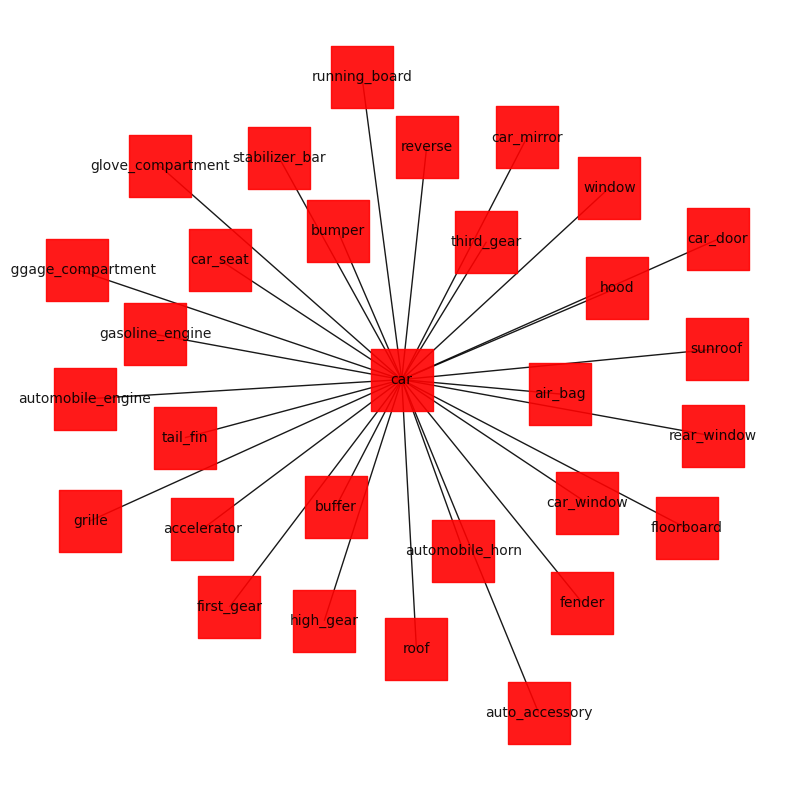

In [28]:
plt.figure(figsize=(10,10))
plt.axis('off')

nx.draw_networkx(G,with_labels=True,node_size=2000,
                 font_size=10,
                 node_shape='s',
                 alpha=0.9,
                 node_color='red')


Можно посчитать близость между синсетами (зависит от того, какой путь нужно пройти по этим связям от одного объекта до другого и есть ли он вообще)

In [29]:
car = wn.synsets('car')[0]
bike = wn.synsets('bike')[0]

In [30]:
bike.path_similarity(car)

0.3333333333333333

Есть и другие метрики:

In [31]:
wn.lch_similarity(bike, car)

2.538973871058276

In [32]:
wn.wup_similarity(bike, car)

0.9166666666666666

### использование WordNet для WSD

Датасеты для обучения и оценки WSD моделей обычно используют смыслы из WordNet. Например, http://lcl.uniroma1.it/wsdeval/ Там очень много данных, поэтому я взял небольшой кусок

In [34]:
corpus_wsd = []
corpus = open('data/corpus_wsd_50k.txt').read().split('\n\n')
for sent in corpus:
    corpus_wsd.append([s.split('\t') for s in sent.split('\n')])

Корпус состоит из предложений, где у каждого слова три поля - значение, лемма и само слово. Значение пустое, когда слово однозначное, а у многозначных слов стоит тэг вида **'long%3:00:02::'** Это тэг wordnet'ного формата

In [35]:
corpus_wsd[1]

[['', 'have', 'Have'],
 ['', 'you', 'you'],
 ['permit%2:41:00::', 'permit', 'permitted'],
 ['', 'it', 'it'],
 ['', 'to', 'to'],
 ['become%2:42:01::', 'become', 'become'],
 ['', 'a', 'a'],
 ['giveaway%1:21:00::', 'giveaway', 'giveaway'],
 ['program%1:09:01::', 'program', 'program'],
 ['rather%4:02:02::', 'rather', 'rather'],
 ['', 'than', 'than'],
 ['', 'one', 'one'],
 ['', 'that', 'that'],
 ['have%2:42:00::', 'have', 'has'],
 ['', 'the', 'the'],
 ['goal%1:09:00::', 'goal', 'goal'],
 ['', 'of', 'of'],
 ['improved%3:00:00::', 'improved', 'improved'],
 ['employee%1:18:00::', 'employee', 'employee'],
 ['morale%1:26:00::', 'morale', 'morale'],
 ['', 'and', 'and'],
 ['', ',', ','],
 ['consequently%4:02:00::', 'consequently', 'consequently'],
 ['', ',', ','],
 ['increased%3:00:00::', 'increased', 'increased'],
 ['productivity%1:07:00::', 'productivity', 'productivity'],
 ['', '?', '?']]

Вот так можно достать соответствующий этому тэгу синсет:

In [36]:
wn.lemma_from_key('program%1:09:01::').synset()

Synset('program.n.02')

In [37]:
wn.lemma_from_key('program%1:09:01::').synset().definition()

'a system of projects or services intended to meet a public need'

### Алгоритм Леска

Как теперь разрешить предсказать правильный смысл для каждого такого случая? Классический способ это сделать - алгоритм Леска, который основан на уже существующей базе значений и их определений (например, на wordnet). Алгоритм у него достаточно простой: 1) для неоднозначного слова находятся определения всех его значений; 2) выбирается контекст, в котором встретилось неоднозначное слово - обычно это какое-то окно вокруг слова (5 слов слева + 5 слов справа); 3) контекст сравнивается с каждым из определений и выбирается значение с наибольшей близостью к контексту. 


Сама имплементация этого алгоритма будет вашим домашним заданием, но мы разберем ключевой пункт этого алгоритма - расчет близости контекста и определения.

Рассмотрим несколько способов.

## Пересечение слов

Самый простой способ - это просто посчитать общие слова. Чем больше общих слова - тем более похожи определение и контекст. Такое удобно написать через множества (set) в питоне

In [157]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word' # само слово не program не используем

In [158]:
(set(definition1.split()) & set(context.split()))

{'a', 'of'}

In [159]:
(set(definition2.split()) & set(context.split()))

{'a', 'computer', 'of', 'that'}

Можно еще конечно почистить от стоп-слов, но уже видно, что это как-то работает. Единственный недостаток такого подхода в том, что он зависит от длины текстов. Можно представить ситуацию, где определение состоит из трех слов и все они есть в контексте, но при этом в другом определении, состоящим из 30 слов, есть 4 пересечения. Хотелось бы метрику, которая устраняет влияние длины текста.

## Jaccard

Пример такой метрики - метрика Жаккара (Jaccard). В ней к пересечению еще добавляется объединение и итоговое значение - это отношение пересечения к объединению. Логика тут в том, чтобы оценить какая доля слов пересекается. Значение будет от 0 до 1, так как пересечение в худшем случае равно 0, а в лучшем равно объединению. 

In [160]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word'

intersection1 = (set(definition1.split()) & set(context.split()))
union1 = (set(definition1.split()) | set(context.split()))
jaccard1 =  len(intersection1) / len(union1)

intersection2 = (set(definition2.split()) & set(context.split()))
union2 = (set(definition2.split()) | set(context.split()))
jaccard2 =  len(intersection2) / len(union2)

In [161]:
jaccard1, jaccard2

(0.1, 0.21052631578947367)

### Косинусная близость

Другая метрика, которую нужно разобрать - косинусная близость (или косинусное расстояние). В каком-то смысле это то же самое, что и Жаккар, но обобщенное на работу с векторами. Саму векторизацию мы пока пропустим и представим, что они у нас уже есть.

Есть геометрическое объяснение косинусного расстояния/близости: угол между двумя одинаковыми векторами равен 0, а косинус 0 - равен 1; угол между перпендикулярными векторами векторами равен 90 градусов, а косинус - 0; угол между векторами направленными в противоположные стороны равен 180, а косинус -1. 

Картинка для примера:

In [57]:
from IPython.display import Image
from IPython.core.display import HTML 

In [58]:
Image(url="https://i.ibb.co/2qFsPLQ/Screenshot-2022-11-16-at-15-36-40.png",
     width=500, height=500)

Допустим в нашем словаре 2 слова: Hi и Mark. На графике изображены три текста: "Hi", "Mark", "Hi Mark". Между Hi и Mark нет ничего общего, они перпендикулярны, поэтому их близость равна 0, а между Hi Mark и Mark уже есть общее, поэтому близость будет ненулевая. 

Но геометрическое объяснение сложновато обобщить на реальные примеры. Уникальных слов обычно сильно больше 2 и, соответственно, нужно к графику выше мысленно добавлять еще сотни или даже тысячи размерностей. Нарисовать такое или даже представить сложновато. 

Поэтому давайте лучше посмотрим на алгебраическую интерпретацию.

Формула вот такая:


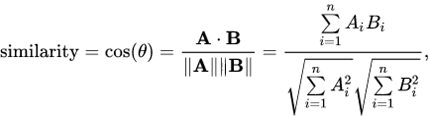

In [59]:
Image(url="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAa0AAAB1CAMAAADKkk7zAAAAaVBMVEX////l5eXBwcErKysAAAD6+vqoqKg5OTnz8/OEhIS+vr7u7u739/fa2trT09OhoaFPT0+Ojo7KyspaWlpkZGS4uLhqamqxsbGZmZlvb29+fn4hISEQEBAmJiZ0dHQ+Pj5HR0cYGBgyMjL2v28PAAARmUlEQVR4nO1dCXucKhQFBTcUxA3cl///Ix/gjEvGNpklyWvi+dqkmZmg9cjl3IUrACdOnDhx4sRLEJo/J/4JRDJKWI6/+zROfASkKl0Z9Ml3n8eJj4A4ZQaIa333eZz4EEgvQDJ6pyn8JxA1EPtpFH33eZz4ALAzAC+rOPzuEznxAeAgByDxz3XrxIkTvxMEQhhdADVOXfg/RpCmlX9BVaZx8VYXErr7MfTCUP/9ujM8sYJOqKQXWDIdkb9/Pyz77Y84kdyXDuMyOSfhNyAfx40WTAZ3z0KOpu1sw0mGms7hXTs6J11fD1yhfsMHTIPtu7BA7t4Ls8ZCf8ubfm8iT3wJSIwKb/0xEds3nWGw96xIxPW3YDzZ+hbQtmF/eisT8bijD5SNmXwl8k+l8S1wmvo4WYK5D7I9W9EwJR6kfOjOMNX3AHcoPrz2QUywj+T2pXycJJNpy0+N8V0gA6rI7cuwVBbSR5X+t8Xn1yTKckc4aa/tocUOfuvEZyOpx4NsiVMzwdKZLZHOk6lsjGHMGz0b2WkOvwVxdjtLoriqOj9FRrFfJEXUT0YKBrVLAT6t4bdAZAeTRBqaLBQD4Ak56/WgmeeYj0pMEn6K+G+AlR5cdmcw081CgyKpyuaIFDOaw5P1lADBJv/21058MpIs3/xkOMJWNWkvDLKyaStBnDjXL/o2cruyKlxNLxWx+MOIJz4NJN1q9MQwhy0upXoZSs4YzwEfwhDgoOqqMssqmZvgB09PkfHVwNmWLDoc5fth0R2U2KSc/tqFixwrrJAYfFqYB/Nq81Me20enEZWpcyMaSZo6v3VyifQwBRHyfojjwXXTrAoO3n8afHKsYAbjWY2qow+FiTjwx5JfSxYeUH8UGMB5ZyM0+FXnIvsTwj3J1A69wdDbNWqms7z6A0hG1Pxh7pTIxMipi+rX15BFQjhXCIXgjKx/ACVCuzTTClKgRl6+8y8+qxOHIG3WoPqwsnlhK0Xj6d/8L8BqGiMkj8yQZsuHMKrGkR9OvqeAq+0dgCNxTt93gYcsFM2xzlBsITdN4wbdVI+94sjddi0kvJhef4yfhkTph9BGzRoBgv71ntdzq1T62onr9BME2246Y8rb1x/ip6EcpRA9Qtli6nI0Xa6jZsvUTQiE0lcrtoTJvVcg6xcf4ecBtqNyeCaExiWSY/K2BleVAShC7YttYciZHQLJZzhqcp1svQs5OollWUpn8GXyLEvYwlaCkP3i4IFn8SEE1zp4fSv8BrbCzT1P7q9V6DPzLVc644CO2Tv2NJndoyf4J3iTWh7pzBX9P7CF6adHs6B/CUPQHIOI53//9BtEQ4saPWm6VnnIdr9X6aFvN8pC2m3doPb1mxcDGzqhuED/J9hXsOVxefsizn0CrGk8uiMJZy9bsT0/M2NFZVeqYznZXXmE0MotK1cD0EBZw/wt1ZF6dw67WvT17pZwfQq8GcRTV2VAX7BFEjb17SWC8egAT+rCgtvTHE31t3iFJrZcc2yYxV7eK8vSZf9MeQkJdroFR9T6fFMEvKq6vfFC1qlzge4RW1FnAged8/yxSVfqb5i3CYhiNbny/lNyGz8I4ZGVwPpF2B+xBTxNVpS+IPKW2MZ20DbTofRUR/SK50f9mQikk1AcJQkEUH0JBYMAm+SZelHP6pktyLjOnWH9mSjx1JRXqwApRk4j/VqivlL15S8H8gIpjZGAjmPMR+hwJ4m0jNIqEHNdF5mb6rvKff0K8xMQplxIm3tdbSehdO2u5IUrO99vfUD8VutTw1Zgp3k3CLWK2W3aTWVSjHEU8hq5Q0XEUNuVx9rmqLz4ChqnTjclSqTFjpP6ykuJufBtBkhm6/cjV+s6ZvYWOtPZzOAIeQPVuuErk9ZYgDhoikI6tsyL+ilUnnrjXNhiKFNSWQmLkKM4H1KI41aJoapmEAKPTq26vJN/IStI4xUX8RLGamhdwe/UCcbJJDF3FWOZBDA13pLVjGkajyZIJNyrgRWbke6TivcAs2E5ylD9f9PvQZMFEEYAd3o/ZqQ4AbC29dKhk0V5c51bJNAOjf6MUC6mdmALxRaQ7awH/CYH0RLiDuEGF+PoNEo+EOGRelA/ebFNeNNZUPn/0WBWKQd1hFita5Rme/UnvIOhAEm0Vn8ewUI/2RxlqcaB1msO8zQW2enFqBkzAsJSM0H1vj1YT1q8a7bEwhagVe+OOlPuXPZBG7Z4Pbs3SZ2B6k9bzjRwZar1le9r/AGvaCjsUVN3an65mi3s63lszUXjef3XLBGNW/sVqMu/HQWI/jWHeRqbcFreTWq2XNjSATXDFin2bAmdbaj0Z1gt92xF2v6lo5Utshtu7/3wytbM68JWotRGNjZcWULNUFjpA/pz5cTKFtzcYsl1VcTwRViWWbiecLD40OH7A3wNltO0ND3FBHA5JvpSLmylO7aiwVZvF7UMsFOzC1vRzFanJw1ren+x95T7Ky7T2FhCJTPhqNN1pK8hFwDTOFNsGQ/BryGg7ny359N13bKqdST+aS3KwnxzGPa/XLcwVQZaKCGGearmkq4YShBXtmq0jSWk+hIzXSs0KGs1UUD7tpKENbMlzJQvq0hyQKWnA+nRGvLB3gaXVYAMtpIojGOmb4tk5F7WKxegVNO6M+lW0VLcXYKyrE3+MtQnINwc5X9ZtIT56GOQt7FfDQmJ2yZ2pIvq0hpQU7CiaQbObdRy6jZNkTj1wLvUbjlrUZtZgJYjmnItE4u56LIb3rnzo9juulKtkNItK9cHXlmnfpZGelOanuqwjLP4MkbVP+lv/TORq49C93kItRgKAqLTFIRgXYTsYf0l9HQxcmgqkvXPxrLDkCrxbT6p7nnzTb2ceObi+O+GoDxqPqtWHcvSI0Qwys2qRntj90iQXG5rGL+f2dAaNVjduw09kCrvXr8T5rpI9uiXo0Tpykc3keI78IIhLmNgWL4oYpCoxSl73J/VlngHZ3o/Tpiq461lFliuDaMDP8QmDk5iDIiSK2EgRG5SGtZcDu8xBqj/0CoYOYw5HwcTB1sm7xviEvhRovxFe5Q5cuQzxV803vm9XvGBMOGerbxeawkDH2OTLyPaT1Q3AhzGRvkpjcJoHHjC5KNslZPbux/HlN4ehdV3DKDQC30jhtmrGpjTePCfElIi3d438mAP7w00UytbKULs+p/ZsQW13sTURjYOsceR8ee8x9lSVz+8C7dDSP7IEPCwVvIhPLvdGTsbbzj50HXcsRW1CA3X++WWLQAnZHQnbU2PrGfYelreE/+xtMX/SDjhu2+cHVuVzuZfPYgNW6Fh7IVsJc8vHvQ3bg3fsoXtMlv3LKxsDZb6q19SbNnalXJQo93vx9mS8mlhJn5jf6ctW05jJSO69hfZsQUb/ZJia6yqSjmRvjYoj7NV3lfgcwR5uB3vh2PLVjp4YFj2LPyBLc65P4ypbrn5OFvx88Ev/vIquX8AG7YipcsJX2oJj9ky61Y0oDZ/CVshhATCB8yi519TFTpoTB4Z4h/Ehq2qyaqqXHTGRmXAN2yFSsJnT7BFi6skZFlfVfEDRXrRtXRSuS1xxoffsYqtbOEplgrZdc/CThPu2cKKrfgJthx+lYS+0yageuBSB9cEOwj4IIH/O1pmrGyJ0dyttL7ojI0lTC5sRUoTms/EpiT+Ybb8JZ5AeBqCmN3vBMl12ZLK1U5/h+a4spXzqdFVj4lauFCmU2A3bHlO1aBGq4weNTpO8jBbG5ERc+WT/73I6xAbkVFkAPbsgbL/fw9Xtvxpcm2BgTO4vTvpcPDGEnqGLZjq4N5k23ZfmJXmYbbWrBBpLMBcIe42hXyJ2oR9BcTg57/BFO7jhFvsI0/NwSceZQuufe2ilABa+nfPC8jXegh1kpH/XID1X8FH2Tra8vEoW9b97NwM8T+uf/tE6IxJ/Be2tBPc6WzJwScezZj4zh2GLzx0pdhdvjH8KdRmyfz3FhbHmFuaLa53RBx8wmQjH6jJmedyqBPrlxKO45yIBhHcPzi9WRJibz/EH/qJJbJyfob3rBfn4wU6UkyZgkmd5T/M9IdUiUXrfqtmRAbhlWQzJPe76oYTDM2d0tHMvT0/qUWGEqnSWYaoqio/pDzPLFmL/1Gm5J9CaBLBpEfT5VrzMusblL65nlTXLOvSkqi+acQKfR1vIQWq+TyErLKh3jwIJRRMmHcSDKqBgP640fyJd3FRCFY7biLxYnjTryjMdBGmJ4Ty12/YSiqT3KI92qZf03EpQSLFiJpJeSWTTxLmgWH4De7YZ4BfgvwS2RvrF6X7Pnr5pYOA+nx/szSKah4ir7ctp8Jis9VRIhP2TQ2fif2C3Yy/E8XVVSpQvLnjKd+uOjDuL53a8vS2DExeK+85cjcpZMhWXlNkbgUfZUQ5eGfXqEexVGbBnSEDu0dFskLOfR6oYuAmp790dSUZ2tYKrY1k8TQ/XS1WU4w4OUh+RYz+9cBrHZ1VN39IIicxdHRSBlhxFfC36xbhyz4cvXQdyT3LdFAgvC68sMiE+Ej914lbJJuHjvD98wUXeB0HFkp10tEe3PhtEWu06c4gmvqIcY5SpRTTSa1Xge7/ys+59RAcud7mYbZpALaBVSjDiFzd+SYI5kLyLfJqc+19dKtC9LLV8crvUhYCqpt83B/lP6HRbadC5KIDv5UMKXP8OZd2BLktQoYpqm6GCKe5FVWKzoeAPoVhF7SQR11f2VQURYoOW8KbX9ptxszb29yzVc8LlY+6c8F6APR61XbF+l518MCYKE4IJMlck09WVQ6vPPOdIJcH8Xh+eRJeaiq4nFfVvv8WLE/Epbs+r1V3u/rjzjDouYYturQgIFeSol0LKHbUODZF5rfYvKaVD5QS/GpwdBHdawWNfvX2eVuEp9p6YeqPqNRWcvmENc4N+UC+tW7iNjsXOn6DOsl51s7JIHiSdRfg4hZVm2VfbDf6hLO5gmWaKtOGgzLLMgkidiWDdPoJXBoyW3/L2kU6EkOtx4ssK8uy6MxDT4hzBuDvA4+bi3+6SX0mu2nBZmWHiefp3aKeecYN4dW1O5YV15de2htJGGXbAKCoZva9+Qk5lxnIpf1p++J/JAhn9sUrGhaRQYutlmf2kZNLHD+7/ovHl03vchEZsNs9sms6DAcK4Z5s3QMPkn68NE+8Xjkv89XtD4nes52IYqwPpTa97sb1Ilg0ZiKtZbqeX0aeHgJDQoVvj8c7d+PzQYX3IkZzw5VrcVKYotpuFQa7tccGoeJwcZE9WeYcn4PA1jV0hTlqJjWC7U6tXashjjdDQJsebFs+8TeUsyhcG9M6jMkrGGPO4ZUOfZstMkKYOC8Q1xoRnOyH0IniA1j2XWU7J4CeGCbicJCs+iuoXJWIhWJNB7uzRyZh4mfU0HwhxGh8q/je/aeb6UJtIxfkvcvQqd/vRmLr5AhZRAaI3iQIrXeFWxTrZmPrk1UAfNNaJTlLZV6FvqG7GttdaxAcdPa7rVhIafplrfWmV/9qhlXVZ/XFq5BqUbjZHr4voIUCvb8X2fSfFWsA3ot2pRyiOWjGf+IhdFoUro2R8jeZkvBPSf8Nci0K2RJ3St5IPdKebL0KrKnCNbkl8t4C1uWhQLo6m3yALQsN4bqZP2eZD5LLCLrUF9YnW69CMKYQpFdJKJKaAnJ9KFD4MbaiaYq8pYKGirhahyD6gVQnW68Cbe2IlkvcScZ7J+gjbMF0tKJqccCcYe8OnGy9ED2izioyXCcIxcWKfdQSeiVykrW/YJlFEfU3lrD9WwPpE3chRbRcpEVkC58sfc8xiPLmA42blCgMFpFBikzQpZOzB0g+FtEZtXgRKsTWCppQyq2vhPNcivfLk5QoDNadZLm/4zcRzBGnf/wisKbcLDThPgzhhfjwgT17WKPNVw8Ykx29oYfxJ3Z4/mWw2vq2DOM+0AF9xtN7T9wCTujg4WT3DVGgc9vcF2FA8klDFfooe/9TJ16BDD39rD2Gzp1YXwR/erq5aj6dYfYvAsuerj2yjrtFnHg94M3WnvuHeKDhw4l/Gv8BnCgeUlxeEn4AAAAASUVORK5CYII=",
     width=500, height=500)


В числителе (вверху) здесь скалярное произдведение - это такая операция с векторами, когда числа, стоящие в двух векторах напротив друг друга перемножаются, а результат складывается. 

В знаменателе (внизу) тут произведение длин векторов, а длина вектора считается как произведение корней из суммы квадратов значений в первом и втором векторах.

Вот пошаговая визуализация расчета близости для двух векторов с абсолютными частотностями. Вектора 1 и 2 здесь это представление двух текстов мешком слов - это такой метод, который показывает какие слова из словаря встречаются в каждом из текстов и в каком количестве, но порядок слов при этом теряется. В этом примере в словаре 6 уникальных слов, поэтому размерность векторов - 6. Каждая из размерностей показывает частотность каждого из слов в словаре в конкретном тексте. Можно увидеть, что первому вектору соответствует текст из 3 слов, которые встретились по 1 разу, а второму вектору соответствует текст тоже из 3 уникальных слов, два из которых такие же как и в первом тексте, но первое с другой частотностью.

In [20]:
Image(url="https://i.ibb.co/Qn87BXW/Screenshot-2022-11-16-at-15-46-54.png",
     width=700, height=700)

Выглядит наверное сложно, но важно понять, что тут происходит. 

Вверху (скалярное произведение) по сути происходит поиск общих слов в первом и втором векторе (=тексте). Если слово есть в одном тексте, а в другом нет - то результат произведения будет нулевой. Чем больше пересечений, тем больше будет итоговое скалярное произведение. **Чем больше значение скалярного произведения, тем больше будет итоговая близость.**

Внизу - просто нормализация. Результат скалярного произведения может быть любым (отрицательным, положительным, большим, маленьким), деление на длину вектра приводит итоговую метрику в удобный интервал от -1 до 1 (а в нашем случае без отрицательных значений от 0 до 1). 

Почему внизу не просто сумма? Потому что значения могут быть отрицательными и может получиться ноль. Для обхода проблемы с нулями часто используется корень из квадрата 
(почему не абсолютное значение - как я понимаю сложный математический вопрос, часто пишут что абсолютное значение сложнее математически, а квадрат проще)

Можно заметить, что это очень похоже на Жаккара. И для этих векторов (посчитанных мешком слов) мы смогли бы посчитать и Жаккара - пересечение это количество ненулевых размерностей, которые есть в обоих векторах, а объединение - это сумма ненулевых размерностей в обоих векторах. Но косинусное расстояние подходит еще и для векторов, которые построены не напрямую из слов. Это могут быть вектора из трансформерной модели, где каждая размерность может принимать как отрицательные так и положительные значений и как правило нулевых размерностей там нет. 

В таких скалярное произведение будет штрафовать пары значений с разными знаками (будет получаться отрицательное число и сумма будет уменьшаться)

## Sentence transformers

Давайте посмотрим как считать близость между реальными векторами текстов. Для этого забежим вперед и возьмем предобученную трансформерную модель, которая умеет создавать эмбеддинг для небольшого текста. 

Модель возьмем из библиотеки [sentence_transformers](https://www.sbert.net/index.html). Это библиотека содержит большое количество моделей, которые предназначены для построение эмбединнгов текстов. Многие из них - специально обученые производить хорошие эмбединги, между которыми удобно рассчитывать близость. На сайте библиотеки есть раздел с лидербордом по моделям. Мы возьмем лучшую (по усредненному скору) модель - `all-mpnet-base-v2`.

In [ ]:
# библиотеки могут заработать не сразу
# можете попробовать установить более новую версию питона если инсталлов ниже не хватает

In [60]:
!python -m pip install torch torchvision torchaudio
!python -m pip install sentence_transformers transformers accelerate -U

In [1]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer

Интерфейс у модели достаточно простой, есть функция encode, которая сама предобрабатывает текст и превращает его в 1 вектор

In [2]:
# embedding model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embed = model.encode

Рассчитаем вектора для определений и контекста, которые мы использовали выше

In [62]:
definition1 = 'a system of projects or services intended to meet a public need'
definition2 = '(computer science) a sequence of instructions that a computer can interpret and execute'
context = 'i wrote a computer _ that predicts the sense of a word'

In [63]:
definition1_emb = embed(definition1)
definition2_emb = embed(definition2)
context_emb = embed(context)

Посмотрим на получившийся вектор. В нем 768 не очень больших, положительных и отрицательных чисел

In [6]:
context_emb.shape

(768,)

In [66]:
context_emb

array([ 2.60696858e-02,  2.81297602e-02, -2.86605358e-02,  2.73304842e-02,
       -2.03045104e-02, -2.45557521e-02, -3.44669889e-03,  1.29649406e-02,
        3.22340988e-02, -1.32162180e-02,  3.78281027e-02, -4.27398421e-02,
        1.42525053e-02,  8.37171823e-02,  3.09127476e-02,  1.17423786e-02,
        6.91081583e-02,  1.30820498e-02, -1.07209831e-02, -2.10680906e-03,
        4.95719211e-03, -1.02009624e-03, -5.77510986e-03,  4.73414510e-02,
       -3.00503504e-02, -3.59182991e-02, -2.45586336e-02, -2.17193905e-02,
       -2.08961219e-02, -2.29210742e-02, -2.80032977e-02,  1.52165564e-02,
       -1.65842436e-02,  4.57603335e-02,  1.44828766e-06, -5.61360009e-02,
       -3.94317359e-02, -1.73282661e-02,  1.10615166e-02, -2.93712430e-02,
        8.55174810e-02,  3.19165811e-02,  4.22134530e-03, -2.52286508e-03,
       -6.43932000e-02,  4.01510037e-02,  4.70006950e-02, -4.48253714e-02,
       -1.41513813e-03,  3.66889797e-02, -8.11715703e-03, -4.46259156e-02,
        2.88627185e-02,  

In [68]:
# для наглядности
context_emb.round(3)

array([ 0.026,  0.028, -0.029,  0.027, -0.02 , -0.025, -0.003,  0.013,
        0.032, -0.013,  0.038, -0.043,  0.014,  0.084,  0.031,  0.012,
        0.069,  0.013, -0.011, -0.002,  0.005, -0.001, -0.006,  0.047,
       -0.03 , -0.036, -0.025, -0.022, -0.021, -0.023, -0.028,  0.015,
       -0.017,  0.046,  0.   , -0.056, -0.039, -0.017,  0.011, -0.029,
        0.086,  0.032,  0.004, -0.003, -0.064,  0.04 ,  0.047, -0.045,
       -0.001,  0.037, -0.008, -0.045,  0.029,  0.021,  0.057, -0.001,
        0.006,  0.022,  0.034, -0.059, -0.031,  0.01 , -0.022,  0.027,
        0.051,  0.022,  0.026, -0.062, -0.005, -0.022,  0.002, -0.035,
       -0.012,  0.029, -0.04 , -0.026,  0.011, -0.012, -0.019, -0.023,
        0.062,  0.011, -0.011,  0.004, -0.004,  0.084, -0.002, -0.034,
        0.012,  0.023,  0.011, -0.016,  0.056,  0.001, -0.009,  0.026,
       -0.027, -0.023,  0.009, -0.077,  0.036,  0.012,  0.059,  0.036,
       -0.017, -0.006,  0.015,  0.02 , -0.073,  0.027, -0.081, -0.021,
      

Рассчитаем косинусную близость с помощью функции из sklearn

In [8]:
cosine_distances(context_emb, definition1_emb)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.60696858e-02  2.81297602e-02 -2.86605358e-02  2.73304842e-02
 -2.03045104e-02 -2.45557521e-02 -3.44669889e-03  1.29649406e-02
  3.22340988e-02 -1.32162180e-02  3.78281027e-02 -4.27398421e-02
  1.42525053e-02  8.37171823e-02  3.09127476e-02  1.17423786e-02
  6.91081583e-02  1.30820498e-02 -1.07209831e-02 -2.10680906e-03
  4.95719211e-03 -1.02009624e-03 -5.77510986e-03  4.73414510e-02
 -3.00503504e-02 -3.59182991e-02 -2.45586336e-02 -2.17193905e-02
 -2.08961219e-02 -2.29210742e-02 -2.80032977e-02  1.52165564e-02
 -1.65842436e-02  4.57603335e-02  1.44828766e-06 -5.61360009e-02
 -3.94317359e-02 -1.73282661e-02  1.10615166e-02 -2.93712430e-02
  8.55174810e-02  3.19165811e-02  4.22134530e-03 -2.52286508e-03
 -6.43932000e-02  4.01510037e-02  4.70006950e-02 -4.48253714e-02
 -1.41513813e-03  3.66889797e-02 -8.11715703e-03 -4.46259156e-02
  2.88627185e-02  2.14875434e-02  5.65632023e-02 -7.84562319e-04
  5.81800705e-03  2.19479781e-02  3.44444998e-02 -5.85746132e-02
 -3.14422622e-02  9.82944295e-03 -2.18724068e-02  2.72080489e-02
  5.10382988e-02  2.24636458e-02  2.58076116e-02 -6.15553483e-02
 -5.12524135e-03 -2.24703737e-02  2.49784882e-03 -3.52916196e-02
 -1.16497632e-02  2.93239839e-02 -3.97467874e-02 -2.59171855e-02
  1.10591054e-02 -1.20284809e-02 -1.90009009e-02 -2.27706600e-02
  6.18728735e-02  1.14581380e-02 -1.07487626e-02  4.07132506e-03
 -3.67226219e-03  8.43563527e-02 -2.39394954e-03 -3.37652229e-02
  1.20446840e-02  2.25450788e-02  1.10169696e-02 -1.64049696e-02
  5.59397414e-02  1.17083488e-03 -9.31880530e-03  2.62642857e-02
 -2.74639539e-02 -2.27501988e-02  8.93268362e-03 -7.66405538e-02
  3.55793536e-02  1.20696472e-02  5.86612076e-02  3.63901295e-02
 -1.65351499e-02 -5.73400129e-03  1.45409070e-02  1.96258314e-02
 -7.27106109e-02  2.72692945e-02 -8.13957080e-02 -2.11496335e-02
 -3.26966271e-02  7.29898438e-02  3.90958190e-02 -4.96897846e-02
 -6.63388595e-02 -1.01196701e-02  6.42161875e-04 -1.88012272e-02
 -1.35782529e-02  1.69789605e-02 -9.91971418e-03  2.28155497e-02
 -4.12469879e-02 -3.77093293e-02 -7.57177593e-03  2.83327959e-02
 -3.02903876e-02 -2.85167098e-02  2.07434315e-02  2.25604214e-02
 -9.28365719e-03 -1.51147833e-02 -8.98459088e-03  6.70140386e-02
 -1.28544942e-02 -5.78452088e-02  2.47775298e-03 -7.97296911e-02
 -2.81679835e-02 -2.84210779e-02 -3.25452425e-02 -6.56164214e-02
 -2.47204620e-02  2.01430097e-02  1.01629477e-02 -5.48637062e-02
  8.94648675e-03  4.05956618e-02 -4.44052890e-02  1.02671042e-01
 -7.56809115e-02  1.26552181e-02  1.37866579e-03 -1.13331880e-02
  1.51405660e-02  2.56871488e-02 -5.24983183e-03  4.51805294e-02
  4.59146686e-02  5.85043104e-03  6.26491150e-03  7.20547792e-03
 -5.88717051e-02 -1.00635946e-01 -6.11553602e-02 -1.08829951e-02
 -5.83557002e-02  4.36093472e-02 -3.92436385e-02  4.10913564e-02
  5.64262178e-03  5.37047759e-02  2.42957957e-02  1.05013326e-01
  6.05127029e-02  2.84899641e-02  5.55243762e-03 -3.09707951e-02
 -1.55448066e-02 -1.46294916e-02 -1.43787283e-02 -3.49355722e-03
 -8.83707330e-02  2.19522649e-03 -2.93946192e-02 -2.35651769e-02
  1.60144772e-02 -5.43737002e-02 -3.02929245e-02 -7.79132126e-03
  1.89319085e-02 -3.13578583e-02  4.60174680e-02 -5.50660631e-03
 -1.92169063e-02 -4.88135181e-02  8.63954145e-03 -4.77152430e-02
  2.17958838e-02 -4.88891192e-02  7.63864294e-02  1.30082771e-01
  3.28815654e-02 -5.33933975e-02  8.30223709e-02  7.57148629e-03
 -2.32078675e-02  4.61315811e-02  2.62386221e-02  1.36163775e-02
 -4.62059826e-02 -2.14045327e-02 -1.82300620e-02  2.83758324e-02
  1.28799668e-02  2.15108078e-02 -4.15302766e-03  3.15550305e-02
  1.82425436e-02 -3.74762639e-02  2.08042860e-02  2.08608937e-02
 -2.82959430e-03 -5.35163693e-02 -4.71888147e-02  1.35965738e-02
  1.38235912e-02  9.01751686e-03 -3.65398708e-03  5.73994629e-02
  2.57573053e-02 -2.01233313e-03 -5.14804944e-02 -2.00652517e-02
 -4.66603264e-02  3.39639969e-02  1.17061762e-02 -5.82824051e-02
  2.77182721e-02  3.31477113e-02  6.75387383e-02  1.22633018e-02
  5.67695983e-02 -6.65890053e-02  5.69646060e-02 -7.09204301e-02
  3.76802348e-02 -1.43325031e-02  4.47984375e-02  7.28084426e-03
  2.85710488e-02  1.60099398e-02  3.72759327e-02 -2.62777582e-02
 -2.46258285e-02 -2.06304975e-02  3.72276478e-03 -4.67101634e-02
  8.38323124e-03 -1.35120293e-02  3.39612849e-02  3.49291484e-03
  4.99470299e-03 -2.49034129e-02  7.93784333e-04 -3.46210860e-02
 -4.31761034e-02  3.18461545e-02 -4.72946931e-03  1.70705188e-02
 -2.31329408e-02 -4.39915759e-03  1.13313077e-02  2.25792192e-02
  3.83138545e-02 -1.36187421e-02  1.68776456e-02  3.40576060e-02
 -3.42961587e-02 -2.40255930e-02 -4.41743918e-02 -3.07683609e-02
 -4.96942215e-02  5.87186776e-02  3.34627815e-02 -3.17160413e-02
 -7.49719329e-03  3.18871289e-02 -2.39836518e-02  2.70108543e-02
  2.77622230e-02 -4.32922244e-02  2.50458159e-02 -2.90878844e-02
 -5.16465493e-03 -3.24391341e-03  1.94145795e-02  4.15609553e-02
  4.53335270e-02 -4.18853667e-03  8.84133205e-03 -3.26370895e-02
  2.16132705e-03  2.40324698e-02  5.22514284e-02 -3.98226120e-02
 -4.63361889e-02  3.35683487e-02  8.99985433e-02  2.09509823e-02
 -3.21147405e-02  4.97947820e-02 -5.90330772e-02 -3.41108479e-02
 -7.22306669e-02 -1.34600475e-02 -4.47860770e-02  6.01749718e-02
 -3.98624782e-03 -5.05394153e-02  8.97321180e-02 -7.15939677e-04
  1.99675821e-02  3.08200088e-03 -2.99170837e-02  2.10373215e-02
  7.66325668e-02 -2.41141766e-02  1.48944026e-02  2.33445171e-04
 -3.57108861e-02 -2.00601127e-02 -2.78608240e-02  3.36323306e-02
 -6.52984530e-02  2.57370248e-03 -2.62748804e-02  2.23488789e-02
  1.96563937e-02  2.94369552e-02 -1.44276265e-02 -2.28903387e-02
 -7.76160210e-02  1.66622142e-03  8.07723925e-02  3.26537266e-02
 -2.33838372e-02  4.45028879e-02  1.28065404e-02  1.65519267e-02
 -5.23447176e-04 -2.67643575e-02 -2.80446447e-02 -1.69686824e-02
 -1.78932026e-02 -2.25125272e-02 -3.50899086e-03 -9.78177879e-03
  7.08928751e-03  1.03520146e-02 -4.23031040e-02 -1.43829808e-02
 -8.08087960e-02  2.69559585e-02  2.88853701e-02 -3.09571866e-02
 -3.26542407e-02  2.75605381e-03  1.02422247e-02 -2.35671792e-02
 -2.33161505e-02  5.81696406e-02  2.19720807e-02 -1.17143495e-02
  1.01174209e-02 -2.66882428e-03 -6.03606440e-02 -2.37942976e-03
  1.21415406e-02 -4.11002859e-02 -4.51718643e-02 -1.60665307e-02
  2.70442460e-02  3.09809074e-02 -3.05432342e-02  3.15632485e-03
 -6.68478161e-02 -1.29532870e-02 -4.91549075e-03 -3.23550291e-02
 -3.58997770e-02 -4.72941734e-02 -1.03332186e-02  4.78735194e-04
 -7.98223615e-02  4.37410586e-02  2.22239434e-03  4.04256135e-02
  6.82347082e-03 -1.96469575e-02  3.53155695e-02  2.63391398e-02
  3.70172337e-02 -7.35288300e-03  1.09556749e-01  5.15761897e-02
 -5.43018468e-02 -4.83204499e-02 -5.97818531e-02 -5.58765978e-03
  6.76242262e-02 -1.12661384e-02  4.74265181e-02 -6.16931589e-03
 -8.67325999e-03 -1.69603527e-02 -1.58700030e-02 -6.41136691e-02
 -4.75617908e-02  1.82289444e-02  6.15704432e-02 -1.81176811e-02
 -4.63466346e-02 -1.21487258e-02  3.53394002e-02  1.43153798e-02
 -1.51322945e-03 -4.43292446e-02  8.88635230e-04 -3.44144069e-02
 -1.51215037e-02  7.00254133e-03 -2.48295208e-03 -6.46390244e-02
 -5.57476804e-02  7.15366192e-03  7.20427837e-03 -8.45418051e-02
 -1.68811772e-02  6.69234549e-04  4.24135625e-02  9.27098654e-03
  5.17644221e-03  1.82485823e-02  1.43265156e-02 -1.22386374e-01
 -1.10516297e-02  2.88278852e-02  6.96114302e-02 -4.52436022e-02
 -3.79772182e-03  1.01903854e-02 -6.72446284e-03 -2.29705274e-02
  6.06019422e-02  7.16592092e-03 -2.32902430e-02  4.78281453e-02
  4.67650816e-02  3.98564376e-02 -5.32545783e-02 -1.64170079e-02
  8.58898915e-04  5.65902935e-03  3.52774933e-02 -2.19531581e-02
  1.59286782e-02  1.41221192e-02 -2.00276058e-02 -9.17218905e-03
 -7.49452505e-03  2.47107036e-02 -2.48925504e-03 -9.48616304e-03
  4.92534135e-03 -2.19699480e-02 -6.24688230e-02  2.18430795e-02
  2.42757834e-02  5.86127490e-02 -5.02397008e-02  3.77099402e-03
 -1.80244390e-02 -2.82009076e-02 -2.79995631e-02 -1.48973903e-02
 -3.07533308e-03 -2.61211246e-02  2.79021319e-02 -2.04358483e-03
 -2.52628494e-02 -3.60019244e-02 -3.50774080e-02 -4.76166494e-02
  1.70159491e-03  5.43572940e-02  5.06276004e-02  4.04567569e-02
  1.00103272e-02 -2.36803927e-02  1.92706790e-02  5.35508106e-03
 -1.91528480e-02  2.40947725e-03 -2.84320526e-02  2.67460588e-02
 -2.68261265e-02  1.71120428e-02 -1.85380150e-02  5.52691147e-03
 -3.09624802e-02 -3.61106507e-02 -4.97021191e-02  6.04570918e-02
  1.61241926e-02 -4.77947854e-02 -3.17425579e-02 -7.21791480e-03
  2.30332687e-02 -1.35370474e-02  6.81777075e-02 -2.20571272e-02
  1.39310835e-02 -7.71866413e-03  1.99044030e-02  5.11281611e-03
 -7.50671551e-02  3.81815545e-02 -8.49779770e-02  1.39642861e-02
  1.07679078e-02 -6.52924925e-02 -1.85855962e-02  2.07402129e-02
  4.84880898e-03  3.73609737e-02 -3.75557207e-02  1.61507502e-02
 -4.15056869e-02 -3.32206041e-02  5.85096329e-02  4.62735929e-02
  5.73100746e-02  2.75436435e-02  4.90288064e-02  5.45493104e-02
 -6.84350030e-03 -4.08428535e-03 -3.86421382e-02  2.65611894e-02
 -2.24672351e-02  1.40256025e-02  3.93021060e-03 -4.97294685e-33
 -3.59437205e-02 -5.74628450e-02 -1.62865128e-02  9.00254678e-03
  1.60071328e-02 -1.28748419e-03 -1.16924280e-02  5.32272682e-02
  1.11453226e-02 -1.07059609e-02 -2.21116026e-03  1.72310579e-03
  2.94323582e-02 -2.58768201e-02  4.24533933e-02  1.73520483e-02
 -1.25585869e-02  9.55471490e-03  1.68609172e-02 -8.00950527e-02
  1.16722668e-02  2.90282853e-02  7.11322501e-02 -4.01582569e-02
  1.51641283e-03  1.55115621e-02 -3.80987749e-02 -1.73638910e-02
  7.47093046e-03  2.56600287e-02 -1.90735031e-02  9.33269411e-02
  8.26741336e-04  3.29675004e-02 -1.44453831e-02  2.23382246e-02
 -9.78794787e-03 -5.95429912e-02  2.51312107e-02  7.84727465e-03
 -3.35632339e-02  2.06995346e-02  2.14453470e-02 -3.03651635e-02
 -3.38789374e-02  3.42657045e-02  8.02799389e-02 -2.27102488e-02
 -1.45141222e-02  1.35908630e-02 -3.66875641e-02  5.68338810e-03
  1.32126007e-02 -3.84590738e-02  2.29348205e-02 -3.02357171e-02
  5.74902864e-03 -6.41770810e-02 -3.17523740e-02  4.55485955e-02
 -1.53187504e-02  3.03061772e-02  6.04593642e-02  1.04117710e-02
  2.54260544e-02  5.37067838e-02  8.20452720e-02 -4.19960497e-03
  6.58357795e-03  6.83037518e-03  3.24908309e-02  1.74423326e-02
  6.07533753e-02  8.56453925e-02  4.81057130e-02 -9.37992185e-02
  4.93356995e-02  2.36274602e-04  1.70228854e-02  3.32530811e-02
  3.10481396e-02  2.79911049e-02 -2.56981142e-02 -3.17143947e-02
  1.03422655e-02 -1.64685361e-02 -4.46704216e-02 -4.09626588e-02
  1.29443863e-02  2.18537985e-04  1.89387016e-02  2.98334397e-02
 -3.28490287e-02 -4.15589474e-02  2.17367448e-02 -2.91569363e-02
 -3.56767070e-03 -4.43830248e-03 -1.84462015e-02  5.87964244e-03
  1.65849365e-02 -3.31492499e-02 -2.50569899e-02  2.18881853e-02
  3.69399004e-02  4.92964080e-03 -5.22426777e-02  1.24047222e-02
 -5.31707965e-02 -2.49955952e-02  7.60653813e-04 -4.11682203e-02
  4.60143015e-02 -2.12279912e-02  2.31682360e-02 -4.59492579e-02
 -1.29493950e-02  1.74553448e-03 -4.47838940e-03  3.03012095e-02
 -3.20938304e-02 -5.02362698e-02 -1.07084615e-02  6.86716195e-03
 -5.05223386e-02  6.73037115e-03 -1.80894174e-02  3.50810401e-02
  5.49725480e-02 -1.24864271e-02 -7.71613931e-03  1.99220050e-02
  2.18156728e-07  4.85302508e-02  5.60069419e-02 -2.00262796e-02
  5.47962673e-02 -2.99007986e-02 -1.53709818e-02  3.61846900e-03
  7.77632650e-03 -9.64170974e-03 -1.96539946e-02  5.73286321e-03
  7.15564843e-03  8.37491546e-03  2.20809933e-02 -4.68556099e-02
 -2.16812119e-02  2.27468014e-02  3.64910699e-02 -7.91412592e-03
  2.46194284e-02  9.09671858e-02  9.61854309e-02  5.92731088e-02
 -1.38591742e-02 -6.40719943e-03 -5.35838231e-02 -1.11716166e-02
 -1.05274292e-02  3.35113294e-02 -2.62926258e-02  3.67871076e-02
 -7.31061120e-03  2.26462316e-02  8.51114765e-02 -2.73483116e-02
 -4.49619032e-02  8.26552585e-02  2.72787884e-02 -2.61984356e-02
  6.16995990e-02 -9.19354148e-04 -2.93136034e-02  1.78981456e-03
 -1.66344941e-02  1.99334715e-02  2.98925079e-02  3.50755975e-02
 -1.89114921e-02 -3.96314077e-02 -5.20372938e-04  5.12182713e-02
 -1.46389212e-02  8.99124425e-03 -3.68658081e-03  7.81543646e-03
  2.73975078e-02 -2.42043957e-02 -3.49381031e-03 -6.62653008e-03
  3.11317313e-02 -3.71047445e-02  3.21330990e-05  1.61609314e-02
 -5.71104772e-02  1.29826050e-02 -6.20196834e-02 -2.54406221e-02
  1.13652132e-34  4.66185063e-03  2.03389302e-02 -2.14782474e-03
 -1.75573342e-02  2.12787408e-02  1.70300659e-02  7.33859986e-02
  1.07082278e-02  3.89475189e-02 -2.34981850e-02 -5.90743609e-02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Сначала у нас будет ошибка, потому что эта функция ожидает двумерные массивы. А у нас два одномерных вектора. Но это можно поправить функцией reshape - она превратит вектор с размерностью (768) в массив с размерностью (1, 768)

In [11]:
cosine_distances(context_emb.reshape(1, -1), definition1_emb.reshape(1, -1))

array([[0.8994292]], dtype=float32)

In [13]:
cosine_distances(context_emb.reshape(1, -1), definition2_emb.reshape(1, -1))

array([[0.6817975]], dtype=float32)

Вместо расстояния можно рассчитать близость (то же самое только вычтенное из единицы). Еще при работе с векторами удобно (и быстрее) считать близость не по одному вектору, а между всеми сразу.

In [16]:
cosine_similarity(context_emb.reshape(1, -1), [definition1_emb, definition2_emb])

array([[0.10057081, 0.3182025 ]], dtype=float32)

# WSI

WSI можно представить как задачу кластеризации контекстов, в которых встречается слово.

Кластеризация - задача разбиения объектов на группы (кластеры). Кластеризация это задача обучения без учителя. 

Основное предположение в кластеризации - объекты, близкие в признаковом пространстве, близки на самом деле. Все алгоритмы кластеризации так или иначе вычисляют близость между объектами (это может быть, например, косинусное расстояние) и стараются организовать кластеры так, чтобы между объектами одного кластера было небольшое расстояние.

Так как считать близости между всеми объектами может быть долго, данные могут распологаться в пространстве странным образом (без четких границ, например) или иметь выбросы, в конкретных алгоритмах кластеризации используются дополнительные предположения и разные трюки. Часто к ним привязывается гиперпараметр(ы), который нужно настраивать самому. Сделать это обычно непросто из-за того, что у нас нет конкретного критерия качества, а сами параметры могут быть непонятными. 

Возьмем данные диалоговского соревнования 2018 года - https://github.com/nlpub/russe-wsi-kit/blob/initial/data/main/wiki-wiki/train.csv (только train часть для простоты)

В данных примеры использования целевых слов и индексы значений, в которых они использованы

В качестве метрики используется Adjusted Rand Index. https://en.wikipedia.org/wiki/Rand_index , http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html  
Это специальная метрика для кластеризации. Ее нужно использовать, потому что нельзя напрямую сравнить индекс кластера и индекс значения. Индексы значений проставлены в случайном порядке и индексы кластеров тоже рассчитываются случайно. Поэтому нужно проверять то, что два контекста находятся в одном кластере и одном значении или разных кластерах и разных значениях, все остальные случаи - ошибка.  ARI именно это и считает, плюс там есть нормализация, которая позволяет исключить, что случайная кластеризация получит хорошие метрики.

In [21]:
# !pip install pandas

Посмотрим на данные

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/nlpub/russe-wsi-kit/initial/data/main/wiki-wiki/train.csv', sep='\t')

In [28]:
df.head(100)

,context_id,word,gold_sense_id,predict_sense_id,positions,context
0,1,замок,1,NaN,"0-5, 339-344",замок владимира мономаха в любече . многочисле...
1,2,замок,1,NaN,"11-16, 17-22, 188-193","шильонский замок замок шильйон ( ) , известный..."
2,3,замок,1,NaN,299-304,проведения архитектурно - археологических рабо...
3,4,замок,1,NaN,111-116,"топи с . , л . белокуров легенда о завещании м..."
4,5,замок,1,NaN,"134-139, 262-267",великий князь литовский гедимин после успешной...
...,...,...,...,...,...,...
95,96,замок,1,NaN,"163-168, 213-218, 364-369",без каминов и очагов . у входа в башню было по...
96,97,замок,1,NaN,"221-226, 276-281",v . в том сражении шотландцы потерпели сокруши...
97,98,замок,1,NaN,"0-5, 16-21, 179-184",замок данноттар замок данноттар ( ) расположен...
98,99,замок,1,NaN,232-237,. благодаря поэме байрона заключение бонивара ...


С помощью функции groupby мы можем сделать словарь: слово, значения которого надо найти - всего его контексты и размеченные значения.

In [29]:
grouped_df = df.groupby('word')[['word', 'context', 'gold_sense_id']]

In [31]:

for key, _ in grouped_df:
    print(grouped_df.get_group(key), "\n\n")
    break

    word                                            context  gold_sense_id
383  бор  бор ( элемент ) бор — элемент тринадцатой груп...              1
384  бор  бор - углерод - кремний семейство сплавов на о...              1
385  бор  с большим выделением теплоты , образуется окси...              1
386  бор  это объясняется прежде всего тем , что у компл...              1
387  бор  совсем малочисленна . элементарный бор в приро...              1
388  бор  действующем при месторождении горно - химическ...              1
389  бор  b c ) . при нагревании в атмосфере кислорода и...              1
390  бор  собственных минералов бора в чужих минералах о...              1
391  бор  бор - углерод - кремний семейство сплавов на о...              1
392  бор  с другими галогенами с образованием тригалоген...              1
393  бор  и в стабильны и входят в состав природного бор...              1
394  бор  номером . обозначается символом b ( ) . в своб...              1
395  бор  и взаимные пере

Давайте рассмотрим несколько популярных алгоритмов кластеризации.

In [50]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
import numpy as np
from sklearn.metrics import adjusted_rand_score

from IPython.display import Image
from IPython.core.display import HTML

### DBSCAN

In [55]:
Image(url= "https://media.giphy.com/media/lCL2GQewp7fkk/giphy.gif")

DBSCAN - это density based алгоритм. Он работает итеративно и объединяет в кластеры объекты, которые лежат плотными кучками. Объекты, лежащие отдельно, считаются выбросами и не кластеризуются. 

Если более детально, то в DBSCAN есть два основных параметра - порог близости (epsilon) и минимальное количество объектов (min_samples). Вначале выбирают объекты, в радиусе epsilon от которых лежит больше min_samples объектов. Такие точки формируют кластеры и объекты попавшие в радиус добавляют в эти кластеры. Далее для каждого объекта попавшего в кластер находятся объекты, которые лежат в радиусе epsilon и они также добавляются в кластер (и так далее пока новых объектов не будет). Визуально DBSCAN похож на расспространение болезни передающейся по воздуху.

DBSCAN сам находит количество кластеров и умеет отфильтровывать выбросы. Параметрами можно настраивать объём окрестности и таким оброзом влиять на кластеры.

Интерактивная визуализация есть тут - https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### Affinity Propagation

In [43]:
Image(url="http://www.ritchievink.com/img/post-14-affinity_propagation/preference_median.gif")

В AP хитрым образом ищутся "экземпляры", объекты в выборке, которые могут использоваться как прототипы. Ближайшие к прототипам объекты записываются в этот кластер.

Приемущества AP - не нужно подбирать количество кластеров.  
Недостатки - медленно и тратится много памяти, параметры не очевидные.

AffinityPropagation работает с не очень большими дасетами, поэтому код ниже может долго работать, когда выбран этот алгоритм.

### Agglomerative clustering

In [56]:
Image(url= "https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/003-hierarchical-clustering-in-r/figures/002-agglomerative-clustering-cutree-cut-dendrogram-1.png")

В агломеративной кластеризации каждому объекту припывается свой кластер и потом ближайшие кластеры постепенно объединяются, пока не получится 1 кластер или не получится количество, заданное как параметр. 

### Kmeans

In [57]:
Image(url= "https://media.giphy.com/media/hgCM9JNzlqAr6/giphy.gif")

KMeans наверное самый известный алгоритм кластеризации. Выбирается количество кластеров, случайно раскидываются центры этих кластеров, объекты относятся к ближайшим кластерам, центры кластеров пересчитываются в среднее значение попавших в него объектов.

Более интерактивную версию можно посмотреть вот тут - https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

KMeans достаточно быстрый, но выбор количества кластеров часто очень не тривиальная проблема.

Про эти и другие алгоритмы можно подробнее почитать вот тут - https://scikit-learn.org/stable/modules/clustering.html

Теперь давайте попробуем решить нашу задачу с помощью алгоритмов кластеризации и sentence transformers

In [59]:
ARI = []

for key, _ in grouped_df:
    # вытаскиваем контексты
    texts = grouped_df.get_group(key)['context'].values

    # создаем пустую матрицу для векторов 
    X = np.zeros((len(texts), 768))

    # переводим тексты в векторы и кладем в матрицу
    for i, text in enumerate(texts):
        X[i] = embed(text)

    # выбираем один из алгоритмов
    # cluster = AffinityPropagation(damping=0.9)
    cluster = KMeans(3)
#     cluster = DBSCAN(min_samples=1, eps=0.1)
    
    cluster.fit(X)
    labels = np.array(cluster.labels_)+1 

    # расчитываем метрику для отдельного слова
    ARI.append(adjusted_rand_score(grouped_df.get_group(key)['gold_sense_id'], labels))
    
print(np.mean(ARI)) # усредненная метрика

/Users/mnefedov/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mnefedov/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mnefedov/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.07963918459393977


/Users/mnefedov/miniforge3/envs/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
